# Preprocessing - Dimentionality Reduction
In this hands-on week, we will try to implement one of popular dimentionality reduction techniques, which is PCA (*Principal Component Analysis*). As explained in the previous week for the mathematical derivation, in this week, you are asked to implement that mathematical formula of PCA to a python function where the code template is provided below. Enjoy~

#### Read Digit MNIST to Array 2D
1. Code below is provided to read MNIST digit '0' and '1' where the final output is a matrix `original_data` (row is for the number of image being read, 200 images, and column is for image features, which is from image pixels = 784 pixels = 28 pixels $\times$ 28 pixels),
2. From 200 rows, the first 100 rows are digit of '0', and next 100 rows are digit of '1'.

In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
import os

# function to read MNIST digit to numpy array
def baca_image(folder_image):
    list_nama_image= os.listdir(folder_image)
    list_path_image = [os.path.join(folder_image, i) for i in list_nama_image]
    original_data = np.ndarray(shape=(0,28*28))
    for i in list_path_image:
        image = cv2.imread(i, 0)
        image_reshaped = image.reshape((1, -1))
        original_data = np.concatenate((original_data, image_reshaped), axis=0)
    return original_data
        
# use the fuction        
digit_0 = baca_image("digit_mnist/0")# adjust with your own path
digit_1 = baca_image("digit_mnist/1")# adjust with your own path

# concatenate digit of '0' and '1'
original_data = np.concatenate((digit_0, digit_1), axis=0)
print("original_data shape:", original_data.shape)

# label
label = np.full((200), 0); label[100:200] = 1
print("label shape:", label.shape)

original_data shape: (200, 784)
label shape: (200,)


## Q01
A template code is already provided below. In Q01, you are asked to complete the `pca` function so that the `original_data` with 784 features will be reduced to **only 2 features with PCA**.

/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


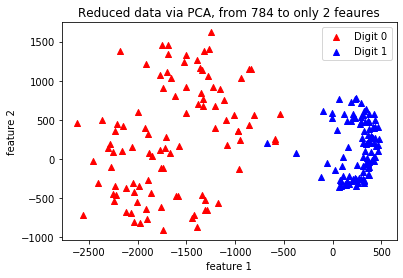

In [2]:
#create PCA function
def pca(input_ori, desired_dim):
    '''
    write code implementation of PCA here
    Hint: all the detailed steps are already explained in
          the previous week. You may take a look to "PCA_slide.pdf"
    parameters:
    a. input_ori: "original_data" in the previous code block
    b. desired_dim: desired dimension = 2
    
    return values:
    a. W: projection matrix of PCA
    b. Y: projeced/reduced data via PCA
    '''
    mean_matrix = np.mean(input_ori, axis=0)
    covariance_matrix = (input_ori - mean_matrix).transpose().dot((input_ori - mean_matrix))

    eigenvalue, eigenvector = np.linalg.eig(covariance_matrix)
    max_cols = (-eigenvalue).argsort()[:desired_dim]
    
    W = eigenvector[:,max_cols]
    Y = input_ori.dot(W)
    return W, Y 

# project the original data of MNIST digit with 784 pixels 
# (28 pixels x 28 pixels) to only two features / dimentions
projection_matrix, reduced_data = pca(input_ori=original_data,desired_dim=2)

#plotting
plt.scatter(reduced_data[0:100:,0], 
            reduced_data[0:100:,1],
            marker="^", c='red', label='Digit 0') #PCA plot for digit of '0'

plt.scatter(reduced_data[100:200:,0], 
            reduced_data[100:200:,1],
            marker="^", c='blue', label='Digit 1') #PCA plot for digit of '1'

plt.title("Reduced data via PCA, from 784 to only 2 feaures")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

#### Illustration of a successfully reduced data via PCA
<img src="ilustrasi_hasil_PCA.JPG" alt="" width="500"/>

To further understand the use of PCA, we will use the reduced data via PCA to a classifier. In this case, we will compare the accuracy when using: (i) `original_data` vs (ii) `reduced_data`.

## Q02
Before feeding to classifier, we will split our data to training and testing data.<br>
a. Please split `original_data` using `StratifiedShuffleSplit` API of scikit-learn with `n_splits=1` and ratio of `70%:30%` for `training:testing data`. From this, we will have: (i) `training_input`, (ii) `training_label`, (iii) `testing_input` and (iv) `testing_label`.

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3)

for train_index, test_index in sss.split(original_data, label):
    training_input, testing_input = original_data[train_index], original_data[test_index]
    training_label, testing_label = label[train_index], label[test_index]

## Q03
a. Train a `DecisionTreeClassifier` (scikit-learn) using training data (`training_input` and `training_label`) of `original_data` you got in Q02, then test the trained model using testing data (`testing_input` and `testing_label`) and calculate the accuracy.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf = clf.fit(training_input, training_label)
testing_pred = clf.predict(testing_input)

print('Score: ', accuracy_score(testing_label, testing_pred))

Score:  0.9833333333333333


## Q04

From Q02(a), you have (i) `training_input`, (ii) `training_label`, (iii) `testing_input` and (iv) `testing_label`: <br><br>
a. Project `training_input` using `pca` function you aready complete before. Here, you will get `projection_matrix` and `reduced_training_input`.<br>
b. Project `testing_input` by this formula $\rightarrow$ `reduced_testing_input` = `testing_input` $\times$ `projection_matrix`.<br>
c. Train a `DecisionTreeClassifier` using `reduced_training_input` & `training_label`, test the trained model using `reduced_testing_input` & `testing_label`, and calculate the accuracy.<br><br>
**Hint:** You may get complex numbers (real-imaginer numbers) from PCA. In this case, you need to convert complex number to real number before feeding to the classifier in Q04(c).

In [38]:
# Project training_input
proj_matrix, reduced_training_input = pca(input_ori=training_input, desired_dim=2)

# Project testing_input
reduced_testing_input = testing_input.dot(proj_matrix)

clf = DecisionTreeClassifier()
clf = clf.fit(np.real(reduced_training_input), training_label)

testing_pred = clf.predict(np.real(reduced_testing_input))

print('Score: ', accuracy_score(testing_label, testing_pred))

Score:  0.9666666666666667


## Q05
How much accuracy do you get from training: "original data" (Q03) and "reduced data via PCA" (Q04.c)? Is it close or different enough? What can you infer from that?

The accuracy we got from classification with original data is 0.9833 and reduced data is 0.9667. The score are dynamically changing as training and testing data changed, but the results are close enough. That means reduced data with PCA can give a close accuracy to the original one, and it is good enough since it reduced computational complexity from classifying 784 features into 2 features only.